In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import tensorflow as tf

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math

In [5]:
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt

In [6]:
#Generate data
np.random.seed(27)
w1 = np.random.rand(2,14)
b1 = np.random.rand(2,1)

w2 = np.random.rand(2,14)
b2 = np.random.rand(2,1)*-10

w3 = np.random.rand(2,14)
b3 = np.random.rand(2,1)*10

w4 = np.random.rand(2,14)
b4 = np.random.rand(2,1)*25

def f(x,w,b):
    out = np.dot(x,w.T) + b.T
    
    return out

def gendata():
    x1 = np.random.randn(300,14)
    x2 = np.random.randn(300,14)
    x3 = np.random.randn(200,14)
    x4 = np.random.randn(200,14)
    obs = np.concatenate((f(x1,w1,b1) + 1.6*np.random.randn(1), f(x2,w2,b2) + 1.3*np.random.randn(1), f(x3,w3,b3) + 1.3*np.random.randn(1), f(x4,w4,b4) + 1.1*np.random.randn(1)))
    return obs, np.vstack([x1,x2,x3,x4])

(1000, 2)
(1000, 14)
[ 0.15620087  0.03622692] [-9.38837594 -2.17037958] [ 1.31373854  4.60711879] [  3.06917465  17.99889061]


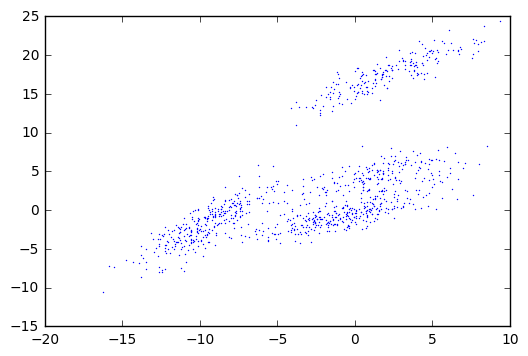

In [7]:

obs, input_x = gendata()

plt.plot(obs[:, 0], obs[:, 1], '.', markersize=1.0)

print obs.shape
print input_x.shape

print f(input_x,w1,b1)[0,:], f(input_x,w2,b2)[0,:], f(input_x,w3,b3)[0,:], f(input_x,w4,b4)[0,:]

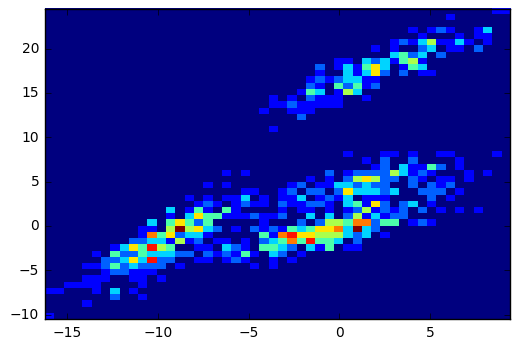

In [8]:
counts, xedges, yedges, image = plt.hist2d(obs[:, 0], obs[:, 1],bins=50)

## Parameters

In [9]:
NSAMPLE = 2500

In [10]:
from aml_dl.mdn.training.config import network_params_inv

Training data folder does not exist...


In [11]:
from aml_dl.mdn.model.mdn_push_inv_model import MDNPushInverseModel

In [12]:
sess = tf.InteractiveSession()

In [13]:
network_params_inv['dim_input'] = 14
network_params_inv['dim_output'] = 2
network_params_inv['k_mixtures'] = 4
network_params_inv['write_summary'] = False

inverse_model = MDNPushInverseModel(sess=sess, network_params=network_params_inv)
inverse_model.init_model()

In [14]:
x_curr   = np.random.randn(1,7).tolist()[0]
x_tgt    = np.random.randn(1,7).tolist()[0]
u_action = np.random.random((1,2))

In [15]:
# input_x = np.expand_dims(np.r_[x_curr, x_tgt], 0)

# x_test = np.float32(np.random.uniform(-5.5, 5.5, (10,14)))

# mus = inverse_model.run_op('mu', x_test)
# sigma = inverse_model.run_op('sigma', x_test)
# pis = inverse_model.run_op('pi', x_test)
# # loss = inverse_model._mdn.run_op(sess,'loss', xs = x_test, ys = u_action)[0]

# print "MUS: ", mus.shape
# print "SIGMA: ", sigma.shape
# print "PIs:", pis.shape
# # print "LOSS:", loss
# #theta = inverse_model.sample_out_max_pi(input_x, 1)[0]
    
# pi_ids = inverse_model._max_pi_idx(pis)
# print pi_ids
# action = mus[0,:, pi_ids]
# print action

In [16]:
xs = input_x#np.random.uniform(-10.5, 10.5, (14, NSAMPLE)).T
ys = obs#np.random.uniform(-10.5, 10.5, (2, NSAMPLE)).T

In [17]:
sess.run(tf.global_variables_initializer())

NEPOCH = 10000
loss = inverse_model.train(x_data = xs, y_data = ys, epochs =  NEPOCH)

In [18]:
print loss[:100]

[ 24.60745239  24.45791054  24.30588341  24.15287971  23.99640274
  23.83471489  23.67175484  23.5034523   23.33211327  23.15651703
  22.98106194  22.80518723  22.62810898  22.44876099  22.26691818
  22.0844059   21.90126038  21.7153492   21.53037834  21.34615898
  21.16147804  20.97651291  20.79209137  20.60534286  20.41755486
  20.22694397  20.03437614  19.84308243  19.65207481  19.46281624
  19.27197075  19.07856178  18.88670349  18.69595909  18.50272179
  18.30858803  18.11511803  17.92302513  17.73152924  17.5426712
  17.35640335  17.17101669  16.98643875  16.80498505  16.62590218
  16.44857979  16.27254868  16.09872246  15.92549801  15.75268936
  15.58052349  15.41131306  15.24264717  15.0754385   14.91012287
  14.74378967  14.58055401  14.41909504  14.25934029  14.09946823
  13.94244003  13.7878809   13.63632393  13.48743248  13.34208202
  13.19802952  13.05326366  12.91049862  12.77060032  12.63269138
  12.4967556   12.36141968  12.22829247  12.09725666  11.96861553
  11.842184

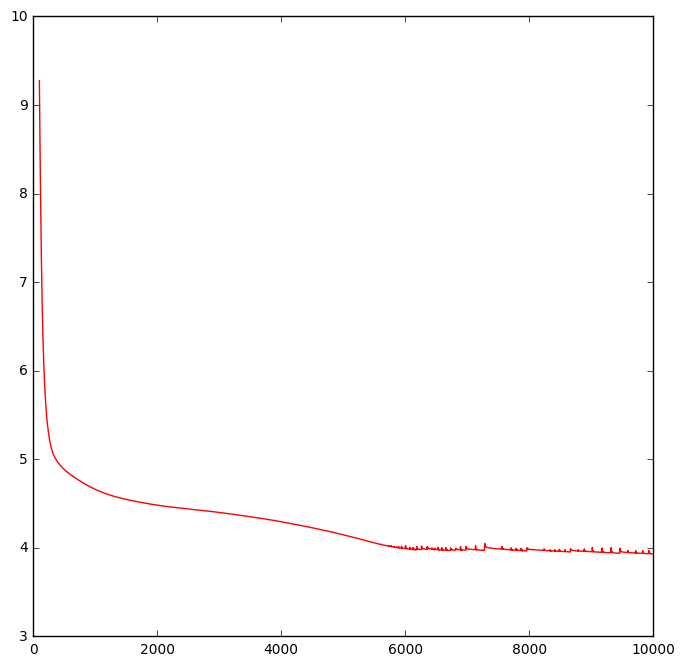

In [19]:
plt.figure(figsize=(8, 8))
plt.plot(np.arange(100, NEPOCH,1), loss[100:], 'r-')
plt.show()

In [20]:
# from aml_dl.mdn.model.tf_mdn_model import MixtureOfGaussians

In [21]:
out_pi = inverse_model._net_ops['pi']
out_sigma = inverse_model._net_ops['sigma']
out_mu = inverse_model._net_ops['mu']
x = inverse_model._net_ops['x']

In [22]:
# mixture = MixtureOfGaussians()

In [23]:
x_test = np.random.uniform(-10.5, 10.5, (14, NSAMPLE)).T
NTEST = x_test.size
# ids


In [46]:
input_x[0]

array([-1.11507676, -1.23370216, -1.26788754,  0.60321692,  1.10255068,
        1.50807299,  0.76113001,  0.51978011,  0.72241364, -0.08678211,
       -0.22698337,  0.22780245,  0.47119014, -2.16606772])

In [53]:
out_pi_test, out_sigma_test, out_mu_test = sess.run([out_pi, out_sigma, out_mu], 
                                                    feed_dict={x: input_x})

In [54]:

print out_pi_test.shape, x_test.shape, out_sigma_test.shape, out_mu_test.shape


(1000, 4) (2500, 14) (1000, 4) (1000, 2, 4)


In [26]:
# print out_mu_test.reshape((300,2))

In [55]:
samples = inverse_model._generate_mixture_samples(out_pi_test,out_mu_test,out_sigma_test, 1000)

In [49]:
print samples.shape

(1, 2, 1000)


<IPython.core.display.Javascript object>


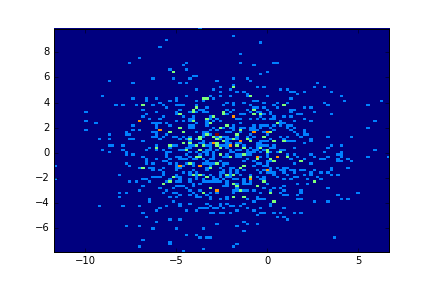

In [ ]:
import time
%matplotlib nbagg
import matplotlib.pyplot as plt
idx = 0
fig, ax = plt.subplots(1,1)
for idx in range(0,1000):
    counts, xedges, yedges, image = ax.hist2d(samples[idx,0,:],samples[idx,1,:], bins = 100)
    fig.canvas.draw()
    time.sleep(1)
    plt.show(block=False)

(1000, 2, 1000)

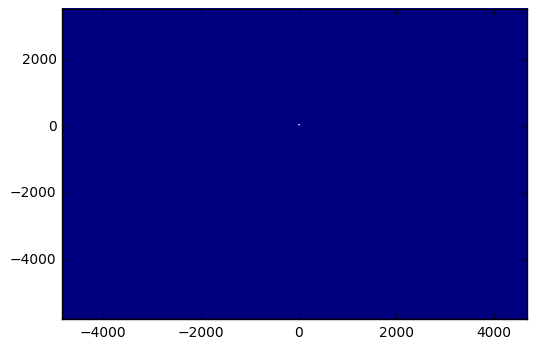

In [44]:
counts, xedges, yedges, image = plt.hist2d(samples[:,0,:].flatten(),samples[:,1,:].flatten(), bins = 500)

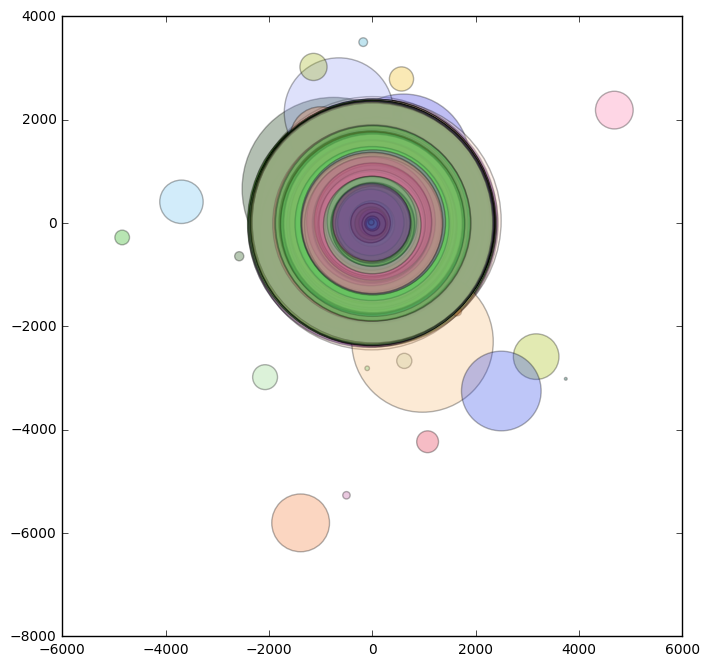

In [29]:
plt.figure(figsize=(8, 8))
plt.scatter(samples[:,0,:],samples[:,1,:],s=out_sigma_test[:,1]*100, c=np.random.rand(2500,3), alpha=0.3)
plt.show()

In [30]:


y_test = mixture.generate_mixture_samples(out_pi_test, out_mu_test, out_sigma_test,100)

plt.figure(figsize=(8, 8))
plt.plot(x_data,y_data,'ro', x_test,y_test,'bo',alpha=0.3)
plt.show()

AttributeError: 'module' object has no attribute 'generate_mixture_samples'